# Time Series Analysis

-  Introduction to Time Series & Creating Time Series object

#1- Importing Key modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import pylab
import matplotlib.pyplot as plt

# 2- Loading and Exploring data

In [3]:
df = pd.read_csv("Index2018.csv")
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df.shape

(6269, 5)

In [5]:
# checking missing values
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [6]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

Date object should be converted to datetime object

### Plotting

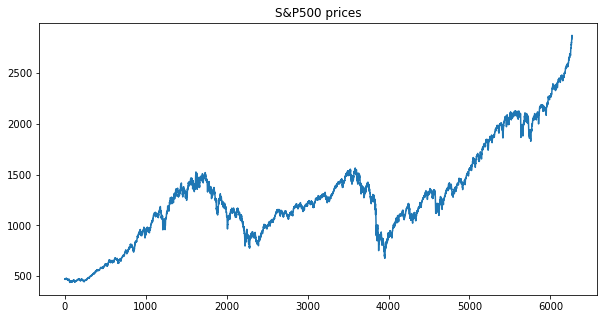

In [7]:
df.spx.plot(figsize=(10,5), title = "S&P500 prices")
plt.show()

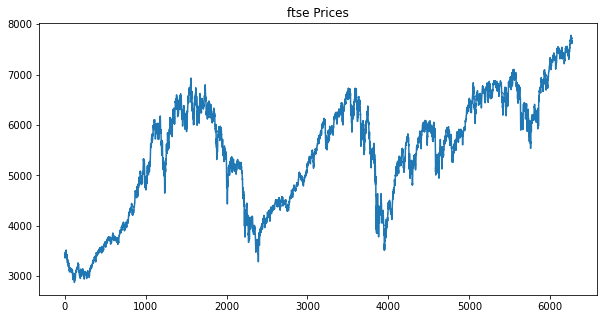

In [8]:
df.ftse.plot(figsize= (10,5), title = "ftse Prices")
plt.show()

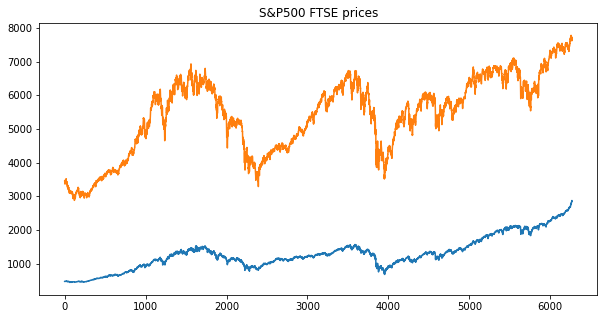

In [9]:
# Comparison of both prices are in same plot
df.spx.plot(figsize=(10,5), title = "S&P500 prices")
df.ftse.plot(figsize= (10,5), title = "ftse Prices")
plt.title("S&P500 FTSE prices")
plt.show()

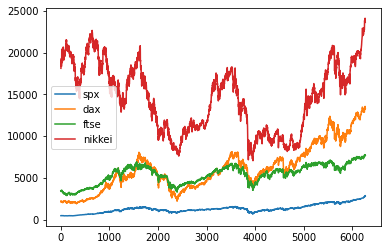

In [10]:
# comparision of all prices

df.plot()
plt.show()

### QQ plot (Quantile-Quantile plot)
It iw used to determine whether a dataset is distributed a certain way. usually showcases how the data fit a normal distribution.

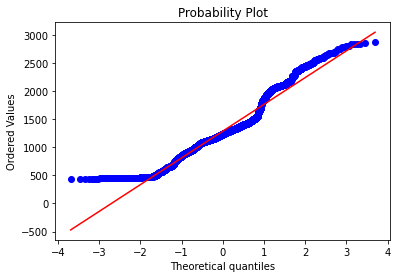

In [11]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

y axis represents the prices, x axis represents the how many standard deviation away from the mean these values are. redline normally distributed line

# 3- Dealing with Time series data

### Length of the time period

In [12]:
df.date.describe() #top generates a arbitrary values, we need to fix it

count           6269
unique          6269
top       31/07/2013
freq               1
Name: date, dtype: object

### Conversion to datetime

In [13]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [14]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [15]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### set the Index

In [16]:
df.set_index("date", inplace = True)

In [17]:
df.head(2)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44


### Setting the desired frequency

In [18]:
df = df.asfreq('d')#we can set the frequency by asfreq..there 'd' means we are observing the value in daily basis
df.shape

(8789, 4)

In [19]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [20]:
df = df.asfreq("b") #'b' means business days..means business stock exchange are off in weekend..thus if we look daily basis we are getting missing values in weekend like sat $ sunday
df.head()#using 'b' tells python to expect missing values when date falls on a sat & sunday

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
df.shape

(6277, 4)

### Handling Missing values

With filtered data

In [22]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [23]:
df.spx = df.spx.fillna(method = "ffill") #fill the missing values of spx with the front filling method

In [24]:
df.ftse = df.ftse.fillna(method = "bfill") #fill the missing values of ftse with the back filling method

In [25]:
df.dax = df.dax.fillna(value = df.dax.mean())

In [26]:
df.nikkei = df.nikkei.fillna(method = "ffill")

In [27]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# 4- Feature Selection

Using most relevent features to make more sense of data.

In [28]:
df['market_value'] = df.spx # a column named market_value is added and identical as spx

In [29]:
df.head(2)

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27


In [30]:
del df['spx'], df['dax'], df['ftse'], df['nikkei'] #delete column

In [31]:
df.head(2)

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27


In [32]:
df.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# For Model Buidling


PReprocessing data

### split the dataset

In [33]:
size = int(len(df)*.80)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [34]:
print(df_train.shape)
print(df_test.shape)

(5021, 1)
(1256, 1)
